In [135]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color = sns.color_palette()
%matplotlib inline

In [136]:
nc = 8
ns = 8
T = 29.7
# T = 29.7
c = np.linspace(18, 26, nc)
s = np.linspace(-14, -22, ns)
X, Y = np.meshgrid(c, s)
X, Y

(array([[18.        , 19.14285714, 20.28571429, 21.42857143, 22.57142857,
         23.71428571, 24.85714286, 26.        ],
        [18.        , 19.14285714, 20.28571429, 21.42857143, 22.57142857,
         23.71428571, 24.85714286, 26.        ],
        [18.        , 19.14285714, 20.28571429, 21.42857143, 22.57142857,
         23.71428571, 24.85714286, 26.        ],
        [18.        , 19.14285714, 20.28571429, 21.42857143, 22.57142857,
         23.71428571, 24.85714286, 26.        ],
        [18.        , 19.14285714, 20.28571429, 21.42857143, 22.57142857,
         23.71428571, 24.85714286, 26.        ],
        [18.        , 19.14285714, 20.28571429, 21.42857143, 22.57142857,
         23.71428571, 24.85714286, 26.        ],
        [18.        , 19.14285714, 20.28571429, 21.42857143, 22.57142857,
         23.71428571, 24.85714286, 26.        ],
        [18.        , 19.14285714, 20.28571429, 21.42857143, 22.57142857,
         23.71428571, 24.85714286, 26.        ]]),
 array([[-14. 

<ipython-input-137-3bcc3817c979>:42: UserWarning: The following kwargs were not used by contour: 'linewidth'
  hl = p_orientation.contour(X, Y, np_orientation_angle(X,Y,T), 8, colors='black', linewidth=.5)
<ipython-input-137-3bcc3817c979>:50: UserWarning: The following kwargs were not used by contour: 'linewidth'
  hl = p_elevation.contour(X, Y, np_elevation_angle(X,Y,T), 8, colors='black', linewidth=.5)


<a list of 7 text.Text objects>

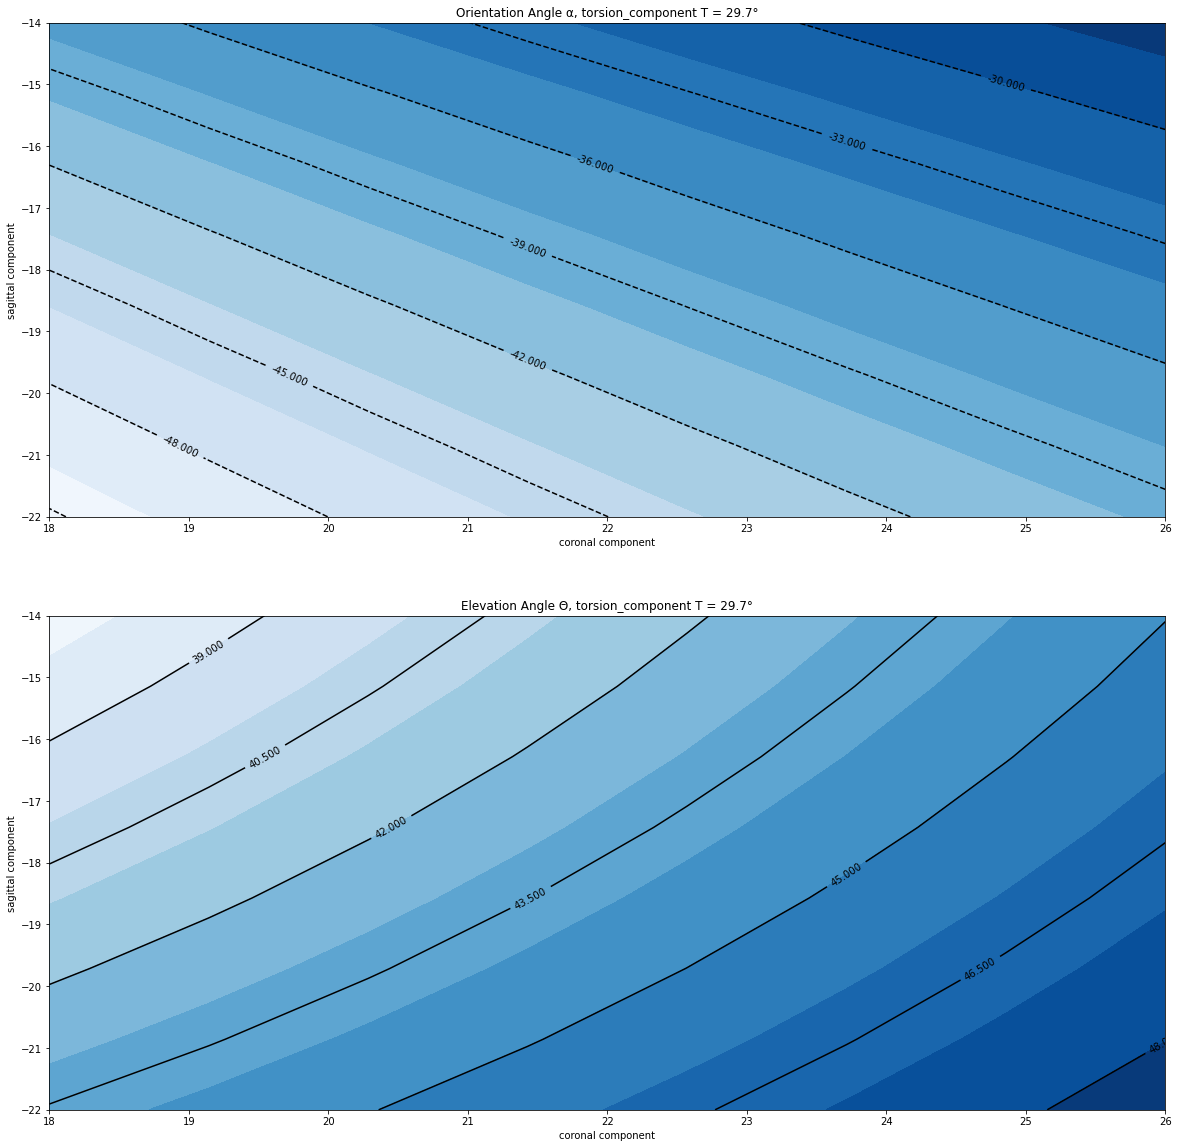

In [137]:
# def orientation_angle(x,y,t):
#     c_a_d, s_a_d, t_a_d, c_a, s_a, t_a, a_tad, a_oa, a_azi, a_ele, a_aor = compute(x, y, t)
#     return a_oa
#
# def elevation_angle(x,y,t):
#     c_a_d, s_a_d, t_a_d, c_a, s_a, t_a, a_tad, a_oa, a_azi, a_ele, a_aor = compute(x, y, t)
#     return a_ele
#
def np_orientation_angle(_c_a_d, _s_a_d, _t_a_d):
    c_a = np.radians(_c_a_d)
    s_a = np.radians(_s_a_d)
    t_a = np.radians(_t_a_d)

    h1 = np.sqrt(np.tan(c_a) * np.tan(c_a) + np.tan(s_a) * np.tan(s_a))
    a_tad = np.arctan2(h1, 1)
    a_oa = np.arctan2(np.tan(s_a), np.tan(c_a))
    a_azi = np.arctan2(-(np.sin(a_oa) + np.sin(a_oa - t_a)), (np.cos(a_oa) + np.cos(a_oa - t_a)))
    a_ele = np.arctan2(2 * np.sin(a_tad) * np.cos(0.5 * t_a), np.sin(t_a) * (1 + np.cos(a_tad)))
    a_aor = np.arccos(0.5 * (np.cos(t_a) + np.cos(a_tad) + np.cos(t_a) * np.cos(a_tad) - 1))
    return np.degrees(a_oa)

def np_elevation_angle(_c_a_d, _s_a_d, _t_a_d):
    c_a = np.radians(_c_a_d)
    s_a = np.radians(_s_a_d)
    t_a = np.radians(_t_a_d)

    h1 = np.sqrt(np.tan(c_a) * np.tan(c_a) + np.tan(s_a) * np.tan(s_a))
    a_tad = np.arctan2(h1, 1)
    a_oa = np.arctan2(np.tan(s_a), np.tan(c_a))
    a_azi = np.arctan2(-(np.sin(a_oa) + np.sin(a_oa - t_a)), (np.cos(a_oa) + np.cos(a_oa - t_a)))
    a_ele = np.arctan2(2 * np.sin(a_tad) * np.cos(0.5 * t_a), np.sin(t_a) * (1 + np.cos(a_tad)))
    a_aor = np.arccos(0.5 * (np.cos(t_a) + np.cos(a_tad) + np.cos(t_a) * np.cos(a_tad) - 1))
    return np.degrees(a_ele)

fig27 = plt.figure(figsize=(20,20))
# fig27.suptitle(f'Elevation Angle {chr(int("398", 16))}', fontsize=14, fontweight='bold')
p_orientation = fig27.add_subplot(211)
p_orientation.set_title(f'Orientation Angle {chr(945)}, torsion_component T = 29.7°')
p_orientation.set_xlabel('coronal component')
p_orientation.set_ylabel('sagittal component')
img = p_orientation.contourf(X, Y, np_orientation_angle(X,Y,T), 12, cmap='Blues')
hl = p_orientation.contour(X, Y, np_orientation_angle(X,Y,T), 8, colors='black', linewidth=.5)
plt.clabel(hl, inline=1, fontsize=10)

p_elevation = fig27.add_subplot(212)
p_elevation.set_title(f'Elevation Angle {chr(int("398", 16))}, torsion_component T = 29.7°')
p_elevation.set_xlabel('coronal component')
p_elevation.set_ylabel('sagittal component')
img = p_elevation.contourf(X, Y, np_elevation_angle(X,Y,T), 12, cmap='Blues')
hl = p_elevation.contour(X, Y, np_elevation_angle(X,Y,T), 8, colors='black', linewidth=.5)
plt.clabel(hl, inline=1, fontsize=10)
# plt.subplots_adjust(hspace=0.2)








